# Project MSI

In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
## default parameter
p_common = 0.8
sigma_v = 0.6
sigma_a = 3.1
sigma_p = 15
mu_p = 0

In [43]:
def p_given_c1(x_v,x_a,sigma_v=0.6,sigma_a=3.1,sigma_p=15,mu_p=0): 
    """
    p(x_v,x_a|C=1) 
    Eq. 4
    """
    return 1 / (2 * np.pi * np.sqrt(sigma_v**2 * sigma_a**2 + sigma_v**2 * sigma_p**2 + sigma_a**2 * sigma_p**2)) * np.exp(-1/2 * ((x_v - x_a)**2 * sigma_p**2 + (x_v - mu_p)**2 * sigma_a**2 + (x_a - mu_p)**2 * sigma_v**2) / (sigma_v**2 * sigma_a**2 + sigma_v**2 * sigma_p**2 + sigma_a**2 * sigma_p**2))

def p_given_c2(x_v,x_a,sigma_v=0.6,sigma_a=3.1,sigma_p=15,mu_p=0): 
    """
    p(x_v,x_a|C=2) 
    Eq. 6
    """
    return 1/(2*np.pi*np.sqrt((sigma_v**2+sigma_p**2)*(sigma_a**2+sigma_p**2)))*np.exp(-1/2*((x_v-mu_p)**2/(sigma_v**2+sigma_p**2)+(x_a-mu_p)**2/(sigma_a**2+sigma_p**2)))
   
def P_C1_given_perception(x_v,x_a,p_common=0.8,sigma_v=0.6,sigma_a=3.1,sigma_p=15,mu_p=0):
    """
    p(C=1|x_v,x_a) = [p(x_v,x_a|C=1)*p_common]/[p(x_v,x_a|C=1)*p_common + p(x_v,x_a|C=2)*(1-p_common)]
    Eq. 2
    """
    p_given_c1_value = p_given_c1(x_v,x_a,sigma_v,sigma_a,sigma_p,mu_p)
    p_given_c2_value = p_given_c2(x_v,x_a,sigma_v,sigma_a,sigma_p,mu_p)
    P_C1_given_perception =  p_given_c1_value*p_common/(p_given_c1_value*p_common+p_given_c2_value*(1-p_common))
    return P_C1_given_perception


### Plot probability of a common cause given noisy stimuli (default)

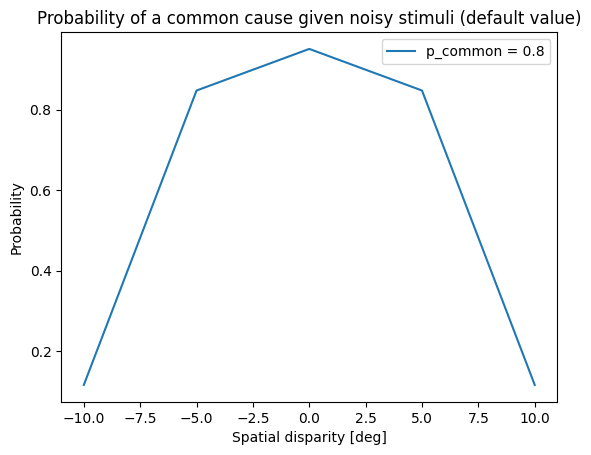

In [ ]:
x_v_values = np.arange(-10, 10 + 1e-5, 5) #locations extended from 10° to the left of the fixation point to 
#10° to the right of the fixation point at 5° intervals
x_a_values = np.zeros(5)
x_diff = x_v_values - x_a_values

P_C1_changeP = [P_C1_given_perception(x_v_values,x_a_values)]

for p in P_C1_changeP:
    plt.plot(x_diff, p, label= f'p_common = {p_common}')
plt.xlabel('Spatial disparity [deg]')
plt.ylabel('Probability of common cause')
plt.title('Probability of a common cause given noisy stimuli (default value)')
plt.legend()
plt.show()

We see that with default values the probability of common cause assumed by participant is less likely then not assuming it (less 50%) for more than +/-7.5°.

### probability of a common cause given noisy stimuli vary P_common

That means we change the prior beliefe, i.e. the prior uncertainty (increase with higher sigma).

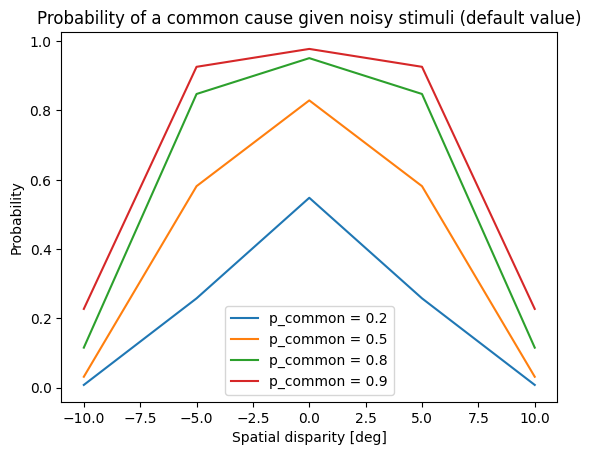

In [ ]:
P_common_difference = [0.2, 0.5, 0.8, 0.9]
P_common_dict = {}
for p_common in P_common_difference: 
    P_C1_values = P_C1_given_perception(x_v_values, x_a_values, p_common=p_common)
    P_common_dict[p_common] = P_C1_values
    
for p_common, p_values in P_common_dict.items():
    plt.plot(x_diff, p_values, label= f'p_common = {p_common}')
plt.xlabel('Spatial disparity [deg]')
plt.ylabel('Probability of common cause')
plt.title('Probability of a common cause given noisy stimuli (default value)')
plt.legend()
plt.show()

### probability of a common cause given noisy stimuli vary sigma_v

That means we make visual data different noisy (higher sigma = more noisy)

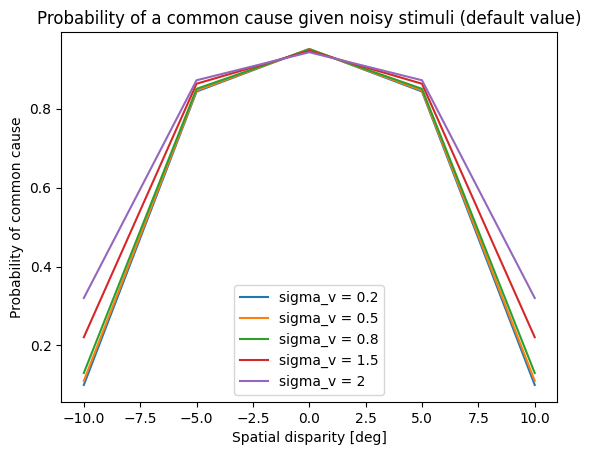

In [59]:
sigma_v_difference = [0.2, 0.5, 0.8, 1.5, 2]
sigma_v_dict = {}
for sigma_v in sigma_v_difference: 
    P_C1_values = P_C1_given_perception(x_v_values, x_a_values, sigma_v=sigma_v)
    sigma_v_dict[sigma_v] = P_C1_values
    
for sigma_v, p_values in sigma_v_dict.items():
    plt.plot(x_diff, p_values, label= f'sigma_v = {sigma_v}')
plt.xlabel('Spatial disparity [deg]')
plt.ylabel('Probability of common cause')
plt.title('Probability of a common cause given noisy stimuli (default value)')
plt.legend()
plt.show()

### probability of a common cause given noisy stimuli vary sigma_a

That means we make the Auditory signal change in noise (higher sigma = more noisy).

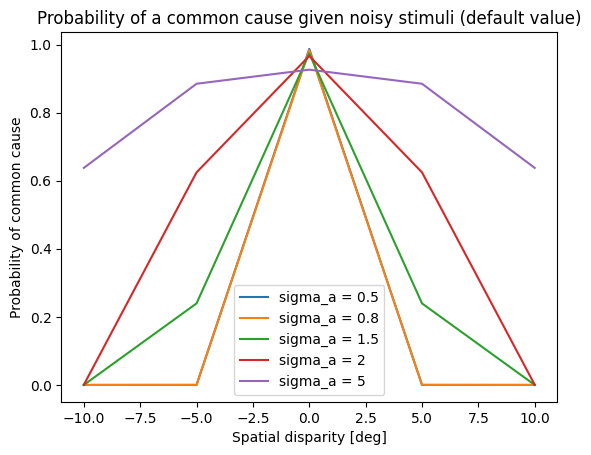

In [57]:
sigma_a_difference = [0.5, 0.8, 1.5, 2, 2,5, 5]
sigma_a_dict = {}
for sigma_a in sigma_a_difference: 
    P_C1_values = P_C1_given_perception(x_v_values, x_a_values, sigma_a=sigma_a)
    sigma_a_dict[sigma_a] = P_C1_values
    
for sigma_a, p_values in sigma_a_dict.items():
    plt.plot(x_diff, p_values, label= f'sigma_a = {sigma_a}')
plt.xlabel('Spatial disparity [deg]')
plt.ylabel('Probability of common cause')
plt.title('Probability of a common cause given noisy stimuli (default value)')
plt.legend()
plt.show()

Need more noise in audio to see a difference. 
But again higher noise increase probability of thinking its a common cause.

### probability of a common cause given noisy stimuli vary sigma_p

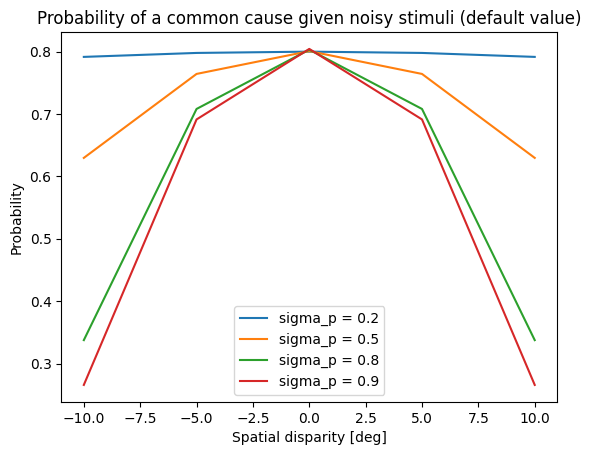

In [ ]:
sigma_p_difference = [0.2, 0.5, 0.8, 0.9]
sigma_p_dict = {}
for sigma_p in sigma_p_difference: 
    P_C1_values = P_C1_given_perception(x_v_values, x_a_values, sigma_p=sigma_p)
    sigma_p_dict[sigma_p] = P_C1_values
    
for sigma_p, p_values in sigma_p_dict.items():
    plt.plot(x_diff, p_values, label= f'sigma_p = {sigma_p}')
plt.xlabel('Spatial disparity [deg]')
plt.ylabel('Probability of common cause')
plt.title('Probability of a common cause given noisy stimuli (default value)')
plt.legend()
plt.show()